In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train = pd.read_csv("/kaggle/input/titanic/train.csv")

print(train_data)
train_data.head()


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_survived = train_data.loc[train_data['Survived'] == 1]
train_died = train_data.loc[train_data['Survived'] == 0]
train_died.drop( ['Name','Sex', "Embarked", "Cabin", "Ticket"], axis = 1, inplace = True)
train_survived.drop( ['Name','Sex', "Embarked", "Cabin", "Ticket"], axis = 1, inplace = True)





for (columnName, columnData) in train_died.iteritems():
    print('Average', columnName, 'for the dead passengers are', train_died[columnName].mean())
print()
for (columnName, columnData) in train_survived.iteritems():
    print('Average', columnName, 'for the alive passengers are', train_survived[columnName].mean())


Average PassengerId for the dead passengers are 447.0163934426229
Average Survived for the dead passengers are 0.0
Average Pclass for the dead passengers are 2.5318761384335153
Average Age for the dead passengers are 30.62617924528302
Average SibSp for the dead passengers are 0.5537340619307832
Average Parch for the dead passengers are 0.3296903460837887
Average Fare for the dead passengers are 22.117886885245902

Average PassengerId for the alive passengers are 444.36842105263156
Average Survived for the alive passengers are 1.0
Average Pclass for the alive passengers are 1.9502923976608186
Average Age for the alive passengers are 28.343689655172415
Average SibSp for the alive passengers are 0.47368421052631576
Average Parch for the alive passengers are 0.4649122807017544
Average Fare for the alive passengers are 48.39540760233918


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000       NaN  0.051184  0.017284 -0.067959 -0.015871   
Survived             NaN       NaN       NaN       NaN       NaN       NaN   
Pclass          0.051184       NaN  1.000000 -0.434168  0.125714  0.068482   
Age             0.017284       NaN -0.434168  1.000000 -0.403734 -0.096298   
SibSp          -0.067959       NaN  0.125714 -0.403734  1.000000  0.477940   
Parch          -0.015871       NaN  0.068482 -0.096298  0.477940  1.000000   
Fare           -0.084730       NaN -0.517378  0.076852  0.282108  0.347307   

                 Fare  
PassengerId -0.084730  
Survived          NaN  
Pclass      -0.517378  
Age          0.076852  
SibSp        0.282108  
Parch        0.347307  
Fare         1.000000  


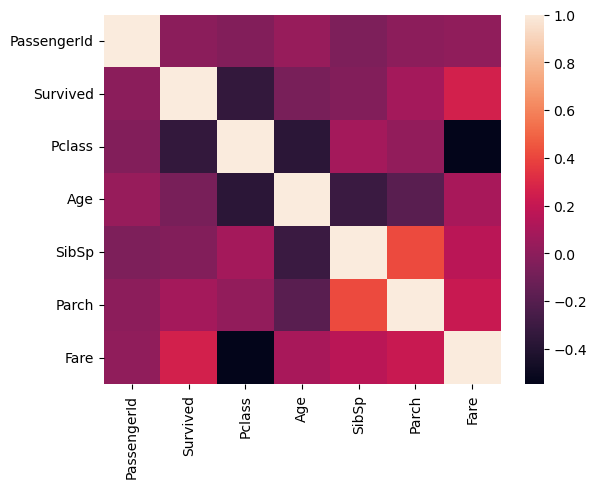

In [4]:
print(train_died.corr())
sns.heatmap(train_data.corr())
plt.show()

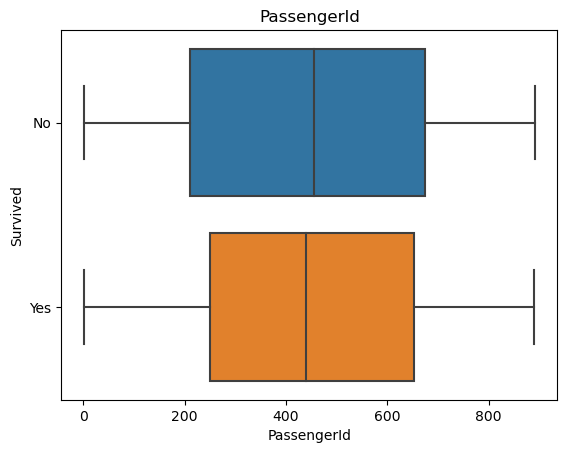

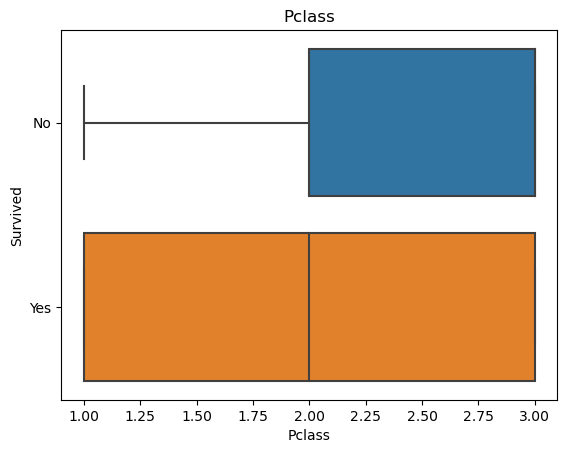

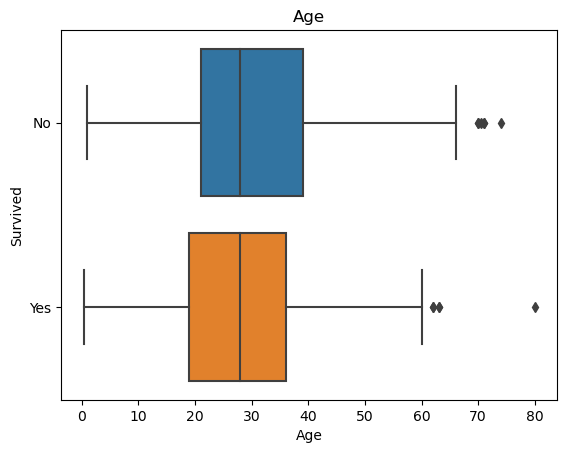

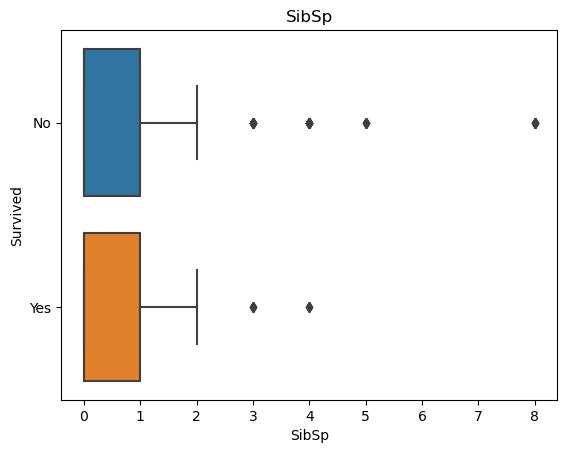

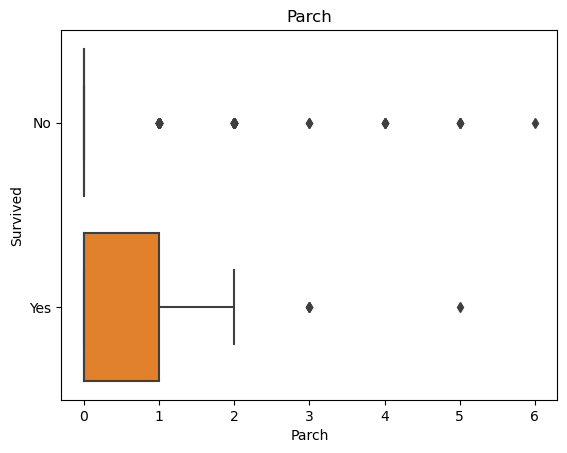

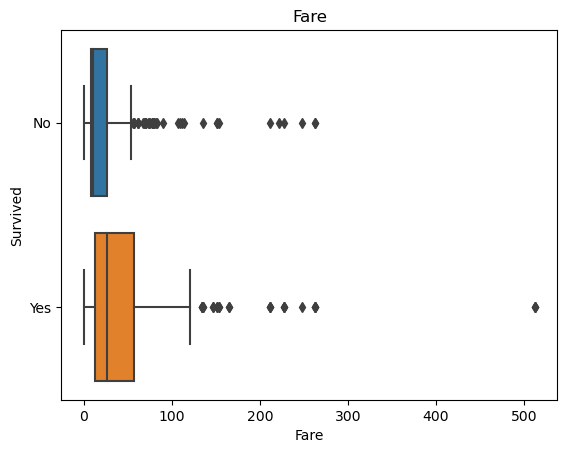

In [5]:
train_data['Survived'] = train_data['Survived'].replace({1: "Yes", 0:"No"})

plt.show()
for columnName in ["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]:
    sns.boxplot(data = train_data,x = train_data[columnName], y = train_data["Survived"] )
    plt.title(columnName)
    plt.show()
    





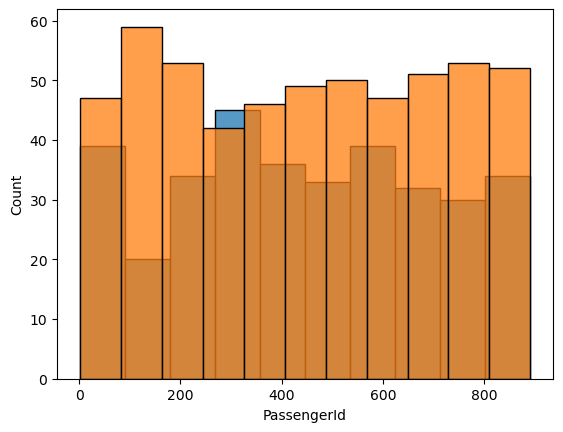

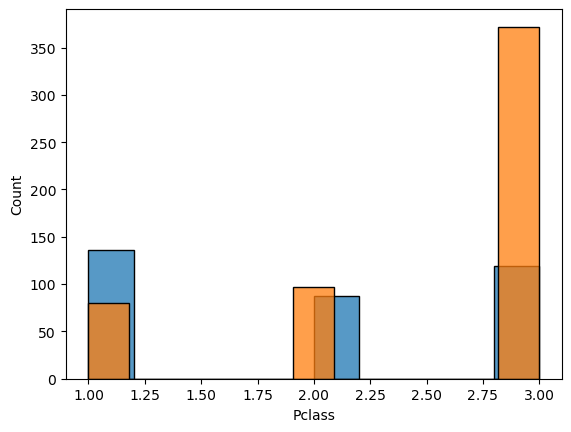

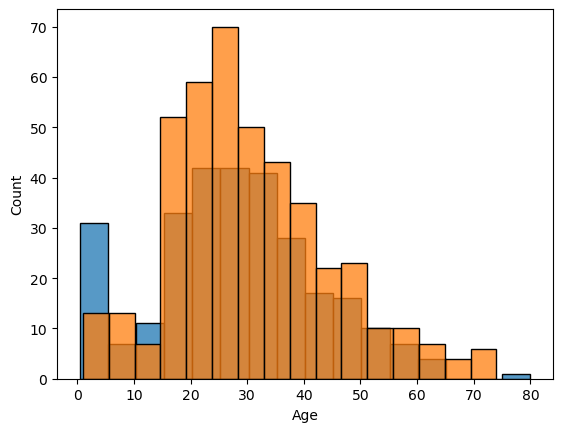

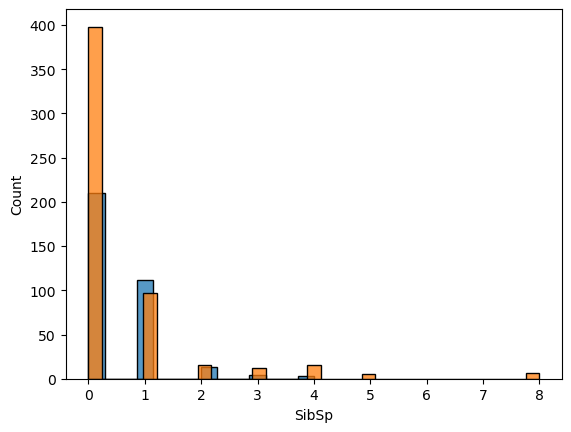

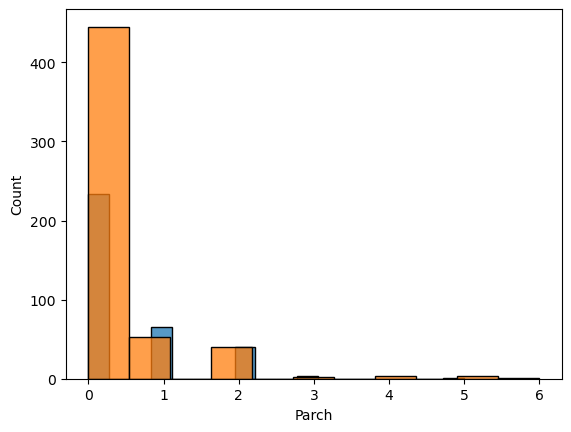

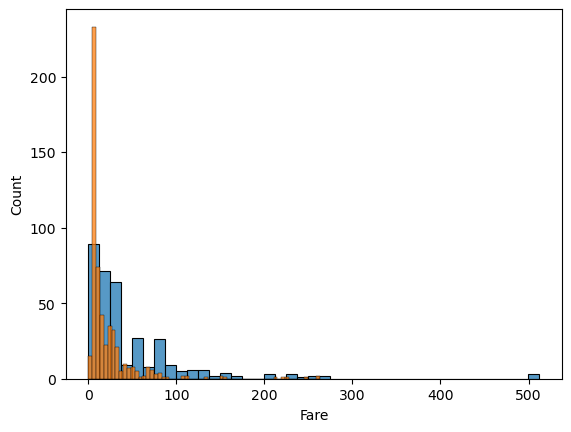

In [6]:
traink = train_survived.drop("Survived", axis = 1)
trains = train_died.drop("Survived", axis = 1)

for columnName in traink:
    sns.histplot(data=traink, x=traink[columnName])
    sns.histplot(data=trains, x=trains[columnName])
    plt.show()


In [7]:
train_survived = train_data.loc[train_data['Survived'] == 1]
train_died = train_data.loc[train_data['Survived'] == 0]
train_died.drop( ['Name','Sex', "Embarked", "Cabin", "Ticket"], axis = 1, inplace = True)
train_survived.drop( ['Name','Sex', "Embarked", "Cabin", "Ticket"], axis = 1, inplace = True)





for (columnName, columnData) in train_died.iteritems():
    print('Average', columnName, 'for the dead passengers are', train_died[columnName].mean())
print()
for (columnName, columnData) in train_survived.iteritems():
    print('Average', columnName, 'for the alive passengers are', train_survived[columnName].mean())

Average PassengerId for the dead passengers are nan
Average Survived for the dead passengers are nan
Average Pclass for the dead passengers are nan
Average Age for the dead passengers are nan
Average SibSp for the dead passengers are nan
Average Parch for the dead passengers are nan
Average Fare for the dead passengers are nan

Average PassengerId for the alive passengers are nan
Average Survived for the alive passengers are nan
Average Pclass for the alive passengers are nan
Average Age for the alive passengers are nan
Average SibSp for the alive passengers are nan
Average Parch for the alive passengers are nan
Average Fare for the alive passengers are nan


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
pd.read_csv("submission.csv")


,PassengerId,Survived
0,892,No
1,893,Yes
2,894,No
3,895,No
4,896,Yes
...,...,...
413,1305,No
414,1306,Yes
415,1307,No
416,1308,No
